In [ ]:
!git config --global user.name "jgp3454"
!git config --global user.email "jgpolinski@gmail.com"


In [17]:
notebook_path = '/content/drive/MyDrive/Fall 2024/PHIL 293/PHIL293 Final Project/Omniglot_VGG_Flower.ipynb'


In [18]:
!cp '/content/drive/MyDrive/Fall 2024/PHIL 293/PHIL293 Final Project/Omniglot_VGG_Flower.ipynb' /content/PHIL293_Final


cp: cannot stat '/content/drive/MyDrive/Fall 2024/PHIL 293/PHIL293 Final Project/Omniglot_VGG_Flower.ipynb': No such file or directory


In [9]:
%cd /content/PHIL293_Final


/content/PHIL293_Final


In [16]:
!git add Omniglot and VGG_Flower.ipynb.ipynb



fatal: pathspec 'Omniglot' did not match any files


## Omniglot

In [ ]:
!git clone https://github.com/google-research/meta-dataset.git
%cd meta-dataset

Cloning into 'meta-dataset'...
remote: Enumerating objects: 3141, done.
remote: Counting objects: 100% (916/916), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 3141 (delta 791), reused 812 (delta 757), pack-reused 2225 (from 1)
Receiving objects: 100% (3141/3141), 3.39 MiB | 17.17 MiB/s, done.
Resolving deltas: 100% (2363/2363), done.
/content/meta-dataset


In [ ]:
!pip install -r requirements.txt
!pip install tensorflow-datasets

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:

import zipfile
import os

# Paths to zip files
zips = {
    "images_background": "/content/drive/My Drive/datasets/Omniglot/images_background.zip",
    "images_evaluation": "/content/drive/My Drive/datasets/Omniglot/images_evaluation.zip",
}

# Output directories
output_dirs = {
    "images_background": "/content/drive/My Drive/datasets/Omniglot/",
    "images_evaluation": "/content/drive/My Drive/datasets/Omniglot/",
}

batch_size = 1000  # Files per batch

# Batch extraction function
def batch_extract(zip_path, output_dir, batch_size):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        file_list = zip_ref.namelist()
        total_files = len(file_list)

        for start in range(0, total_files, batch_size):
            end = min(start + batch_size, total_files)
            batch_files = file_list[start:end]

            print(f"Extracting files {start + 1} to {end} out of {total_files} in {os.path.basename(zip_path)}...")
            for file in batch_files:
                output_path = os.path.join(output_dir, file)
                if not os.path.exists(output_path):  # Avoid re-extraction
                    zip_ref.extract(file, output_dir)
            print(f"Batch {start // batch_size + 1} completed.")

# Extract both datasets
for dataset, zip_path in zips.items():
    print(f"Starting extraction for {dataset}...")
    batch_extract(zip_path, output_dirs[dataset], batch_size)
    print(f"Completed extraction for {dataset}.")



Starting extraction for images_background...
Extracting files 1 to 1000 out of 20275 in images_background.zip...
Batch 1 completed.
Extracting files 1001 to 2000 out of 20275 in images_background.zip...
Batch 2 completed.
Extracting files 2001 to 3000 out of 20275 in images_background.zip...
Batch 3 completed.
Extracting files 3001 to 4000 out of 20275 in images_background.zip...
Batch 4 completed.
Extracting files 4001 to 5000 out of 20275 in images_background.zip...
Batch 5 completed.
Extracting files 5001 to 6000 out of 20275 in images_background.zip...
Batch 6 completed.
Extracting files 6001 to 7000 out of 20275 in images_background.zip...
Batch 7 completed.
Extracting files 7001 to 8000 out of 20275 in images_background.zip...
Batch 8 completed.
Extracting files 8001 to 9000 out of 20275 in images_background.zip...
Batch 9 completed.
Extracting files 9001 to 10000 out of 20275 in images_background.zip...
Batch 10 completed.
Extracting files 10001 to 11000 out of 20275 in images_b

In [ ]:
import os

# Path to extracted files
background_dir = "/content/drive/My Drive/datasets/Omniglot/images_background"
evaluation_dir = "/content/drive/My Drive/datasets/Omniglot/images_evaluation"

# Check a few files
for root, dirs, files in os.walk(background_dir):
    print(f"Directory: {root}")
    print(f"Subdirectories: {dirs[:5]}")  # Show up to 5 subdirectories
    print(f"Files: {files[:5]}")          # Show up to 5 files
    break


Directory: /content/drive/My Drive/datasets/Omniglot/images_background
Subdirectories: ['Alphabet_of_the_Magi', 'Anglo-Saxon_Futhorc', 'Arcadian', 'Armenian', 'Asomtavruli_(Georgian)']
Files: []


In [ ]:
def find_all_image_files(root_dir, valid_extensions={".png"}):
    """
    Recursively find all image files and assign numeric labels based on their character directory.
    """
    image_files = []
    labels = []
    label_map = {}
    label_id = 0

    for alphabet in os.listdir(root_dir):
        alphabet_path = os.path.join(root_dir, alphabet)
        if not os.path.isdir(alphabet_path):
            continue
        for character in os.listdir(alphabet_path):
            character_path = os.path.join(alphabet_path, character)
            if not os.path.isdir(character_path):
                continue
            label_map[label_id] = f"{alphabet}/{character}"
            for img_name in os.listdir(character_path):
                if img_name.lower().endswith(tuple(valid_extensions)):
                    image_files.append(os.path.join(character_path, img_name))
                    labels.append(label_id)
            label_id += 1
    return image_files, labels, label_map

# Call the function to collect image paths and labels
image_files, labels, label_map = find_all_image_files("/content/drive/My Drive/datasets/Omniglot/images_background")

# Verify the results
print(f"Total images found: {len(image_files)}")
print(f"Total classes: {len(label_map)}")
print(f"Example image: {image_files[0]}, Label: {labels[0]}, Class: {label_map[labels[0]]}")


Total images found: 19280
Total classes: 964
Example image: /content/drive/My Drive/datasets/Omniglot/images_background/Alphabet_of_the_Magi/character01/0709_01.png, Label: 0, Class: Alphabet_of_the_Magi/character01


In [ ]:
import os

# Check file sizes
empty_files = [f for f in image_files if os.path.getsize(f) == 0]
if empty_files:
    print(f"Found {len(empty_files)} empty files:")
    print(empty_files)
else:
    print("No empty files found.")


No empty files found.


In [ ]:
import tensorflow as tf

# Test loading images
for file_path in image_files[:5]:  # Test first 5 files
    try:
        img = tf.io.read_file(file_path)
        img = tf.image.decode_image(img, channels=1)
        print(f"Loaded image: {file_path}, Shape: {img.shape}")
    except Exception as e:
        print(f"Failed to load image: {file_path}, Error: {e}")


Loaded image: /content/drive/My Drive/datasets/Omniglot/images_background/Alphabet_of_the_Magi/character01/0709_01.png, Shape: (105, 105, 1)
Loaded image: /content/drive/My Drive/datasets/Omniglot/images_background/Alphabet_of_the_Magi/character01/0709_02.png, Shape: (105, 105, 1)
Loaded image: /content/drive/My Drive/datasets/Omniglot/images_background/Alphabet_of_the_Magi/character01/0709_03.png, Shape: (105, 105, 1)
Loaded image: /content/drive/My Drive/datasets/Omniglot/images_background/Alphabet_of_the_Magi/character01/0709_04.png, Shape: (105, 105, 1)
Loaded image: /content/drive/My Drive/datasets/Omniglot/images_background/Alphabet_of_the_Magi/character01/0709_05.png, Shape: (105, 105, 1)


In [ ]:
def create_tf_dataset(image_files, labels, image_size=(28, 28), batch_size=32, shuffle=True):
    """
    Create a TensorFlow dataset of images and labels with explicit shape handling.
    """
    def load_and_preprocess_safe(file_path, label):
        try:
            # Load and preprocess the image
            img = tf.io.read_file(file_path)
            img = tf.image.decode_image(img, channels=1)  # Grayscale

            # Explicitly set the shape for Omniglot images
            img.set_shape([105, 105, 1])

            # Resize and normalize the image
            img = tf.image.resize(img, image_size) / 255.0
            return img, label
        except Exception as e:
            print(f"Error loading image {file_path.numpy().decode('utf-8')}: {e}")
            return tf.zeros(image_size + (1,), dtype=tf.float32), label

    # Create the TensorFlow dataset
    dataset = tf.data.Dataset.from_tensor_slices((image_files, labels))
    dataset = dataset.map(
        lambda f, l: tf.py_function(func=load_and_preprocess_safe, inp=[f, l], Tout=(tf.float32, tf.int32)),
        num_parallel_calls=tf.data.AUTOTUNE
    )
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(image_files))
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

# Create the dataset
tf_dataset = create_tf_dataset(image_files, labels, image_size=(28, 28), batch_size=32)

# Inspect the dataset
for batch_images, batch_labels in tf_dataset.take(1):
    print(f"Batch image shape: {batch_images.shape}")
    print(f"Batch label shape: {batch_labels.shape}")


Batch image shape: (32, 28, 28, 1)
Batch label shape: (32,)


## Omni KNN

In [ ]:
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

def run_knn_pipeline_with_chollet(tf_dataset, num_classes, num_train_samples, num_test_samples, k=3, lambda_factor=0.1):
    """
    Run a KNN pipeline to evaluate the model on multiple tasks and compute Chollet's intelligence measure.

    Args:
        tf_dataset (tf.data.Dataset): The TensorFlow dataset.
        num_classes (int): Number of classes per task.
        num_train_samples (int): Number of training samples per class.
        num_test_samples (int): Number of test samples per class.
        k (int): Number of neighbors for KNN.
        lambda_factor (float): Weight for cost in Chollet's measure.

    Returns:
        float: Chollet's intelligence score.
        list: Task metrics including utility and cost for each task.
    """

    class KNNModel:
        def __init__(self, k):
            self.k = k
            self.model = KNeighborsClassifier(n_neighbors=k)

        def fit(self, X_train, Y_train):
            self.model.fit(X_train, Y_train)

        def predict(self, X_test):
            return self.model.predict(X_test)

        def evaluate(self, X_test, Y_test):
            predictions = self.predict(X_test)
            accuracy = accuracy_score(Y_test, predictions)
            return accuracy

    def create_task_tf(tf_dataset, num_classes, num_train_samples, num_test_samples):
      """
      Create an N-way K-shot task using a TensorFlow dataset with flattened images.
      """
      data, labels = [], []
      for batch_data, batch_labels in tf_dataset:
          # Flatten images to 1D feature vectors
          flattened_data = tf.reshape(batch_data, [batch_data.shape[0], -1]).numpy()
          data.extend(flattened_data)
          labels.extend(batch_labels.numpy())
      data = np.array(data)
      labels = np.array(labels)

      # Unique classes
      unique_classes = np.unique(labels)
      selected_classes = random.sample(list(unique_classes), num_classes)

      X_train, Y_train, X_test, Y_test = [], [], [], []

      # Sample data for each selected class
      for cls in selected_classes:
          class_indices = np.where(labels == cls)[0]
          class_data = data[class_indices]
          np.random.shuffle(class_data)

          # Split into train and test sets
          X_train.extend(class_data[:num_train_samples])
          X_test.extend(class_data[num_train_samples:num_train_samples + num_test_samples])
          Y_train.extend([cls] * num_train_samples)
          Y_test.extend([cls] * num_test_samples)

      return {
          "X_train": np.array(X_train),
          "Y_train": np.array(Y_train),
          "X_test": np.array(X_test),
          "Y_test": np.array(Y_test),
          "task_name": f"{num_classes}-way Classification Task"
      }


    def evaluate_knn_on_task(task, knn_model):
        """
        Train and evaluate KNN on a single task.
        """
        X_train, Y_train = task["X_train"], task["Y_train"]
        X_test, Y_test = task["X_test"], task["Y_test"]

        # Train the KNN model
        knn_model.fit(X_train, Y_train)

        # Evaluate accuracy
        accuracy = knn_model.evaluate(X_test, Y_test)

        return accuracy

    def chollet_score(task_metrics, lambda_factor):
        """
        Compute Chollet's intelligence score from task metrics.
        """
        total_score = 0
        for metric in task_metrics:
            utility, cost = metric["utility"], metric["cost"]
            total_score += utility - lambda_factor * cost
        return total_score / len(task_metrics)

    # Initialize the KNN model
    knn_model = KNNModel(k)

    # Evaluate on multiple tasks
    task_metrics = []
    for _ in range(5):  # Run 5 tasks
        task = create_task_tf(tf_dataset, num_classes, num_train_samples, num_test_samples)
        accuracy = evaluate_knn_on_task(task, knn_model)
        cost = 0.0  # Placeholder for actual cost measurement (e.g., time)
        task_metrics.append({"utility": accuracy, "cost": cost})
        print(f"Task: {task['task_name']} | Utility: {accuracy:.2f}, Cost: {cost:.2f}s")

    # Compute Chollet's intelligence score
    score = chollet_score(task_metrics, lambda_factor)
    print(f"Chollet's Intelligence Score: {score:.2f}")

    return score, task_metrics


In [ ]:
score, task_metrics = run_knn_pipeline_with_chollet(
    tf_dataset=tf_dataset,        # Preprocessed TensorFlow dataset
    num_classes=5,                # 5-way classification
    num_train_samples=5,          # 5-shot training
    num_test_samples=15,          # 15 query samples per class
    k=3,                          # Number of neighbors for KNN
    lambda_factor=0.1             # Cost penalty
)



Task: 5-way Classification Task | Utility: 0.60, Cost: 0.00s
Task: 5-way Classification Task | Utility: 0.39, Cost: 0.00s
Task: 5-way Classification Task | Utility: 0.61, Cost: 0.00s
Task: 5-way Classification Task | Utility: 0.73, Cost: 0.00s
Task: 5-way Classification Task | Utility: 0.53, Cost: 0.00s
Chollet's Intelligence Score: 0.57


## OMNI RNN

In [ ]:
def preprocess_image_for_rnn(image, label):
    """
    Preprocess images for RNN by reshaping into sequences.
    """
    # Remove the channel dimension (28, 28, 1 -> 28, 28)
    image = tf.squeeze(image, axis=-1)  # Shape: (28, 28)

    # Return the processed image
    return image, label


In [ ]:
def prepare_rnn_dataset(tf_dataset, batch_size=32):
    """
    Prepare the TensorFlow dataset for RNNs.
    Handles inconsistent batches by unbatching and rebatching.
    """
    dataset = tf_dataset.unbatch()  # Unbatch to ensure consistency
    dataset = dataset.batch(batch_size, drop_remainder=True)  # Rebatch with consistent sizes
    return dataset

# Prepare the dataset
rnn_dataset = prepare_rnn_dataset(tf_dataset, batch_size=32)

# Inspect the dataset
for batch_images, batch_labels in rnn_dataset.take(1):
    print(f"Batch image shape: {batch_images.shape}")  # Should be (batch_size, 28, 28)
    print(f"Batch label shape: {batch_labels.shape}")  # Should be (batch_size,)


Batch image shape: (32, 28, 28, 1)
Batch label shape: (32,)


In [ ]:
from tensorflow.keras import Input,Sequential
from tensorflow.keras.layers import LSTM, Dense

def create_rnn_model(input_shape, num_classes):
    """
    Create an RNN model using LSTM for classification.

    Args:
        input_shape (tuple): Shape of input data (sequence_length, features).
        num_classes (int): Number of output classes.

    Returns:
        tf.keras.Model: Compiled RNN model.
    """
    model = Sequential([
        Input(shape=input_shape),  # Explicitly define input shape here
        LSTM(64, return_sequences=False),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model



In [ ]:
def create_task_for_rnn(tf_dataset, num_classes, num_train_samples, num_test_samples):
    """
    Create an N-way K-shot task using a TensorFlow dataset.

    Args:
        tf_dataset (tf.data.Dataset): The preprocessed TensorFlow dataset.
        num_classes (int): Number of classes for the task.
        num_train_samples (int): Number of training samples per class.
        num_test_samples (int): Number of test samples per class.

    Returns:
        dict: A task dictionary containing train and test data.
    """
    data, labels = [], []
    for batch_data, batch_labels in tf_dataset:
        data.extend(batch_data.numpy())
        labels.extend(batch_labels.numpy())
    data = np.array(data)
    labels = np.array(labels)

    unique_classes = np.unique(labels)
    selected_classes = random.sample(list(unique_classes), num_classes)

    X_train, Y_train, X_test, Y_test = [], [], [], []

    for cls in selected_classes:
        class_indices = np.where(labels == cls)[0]
        class_data = data[class_indices]
        np.random.shuffle(class_data)

        # Ensure enough samples are available
        if len(class_data) < num_train_samples + num_test_samples:
            raise ValueError(f"Class {cls} does not have enough samples.")

        X_train.extend(class_data[:num_train_samples])
        X_test.extend(class_data[num_train_samples:num_train_samples + num_test_samples])
        Y_train.extend([cls] * num_train_samples)
        Y_test.extend([cls] * num_test_samples)

        # Convert lists to NumPy arrays
        X_train = np.array(X_train)  # Shape: (num_samples, 28, 28, 1)
        X_test = np.array(X_test)    # Shape: (num_samples, 28, 28, 1)

        # Remove the channel dimension for RNN input (28, 28, 1 -> 28, 28)
        X_train = np.squeeze(X_train, axis=-1)
        X_test = np.squeeze(X_test, axis=-1)

        return {
            "X_train": X_train,  # Shape: (num_classes * num_train_samples, 28, 28)
            "Y_train": np.array(Y_train),  # Shape: (num_classes * num_train_samples,)
            "X_test": X_test,    # Shape: (num_classes * num_test_samples, 28, 28)
            "Y_test": np.array(Y_test),    # Shape: (num_classes * num_test_samples,)
            "task_name": f"{num_classes}-way Classification Task"
        }

In [ ]:
import time

def evaluate_rnn_on_task(task, input_shape, num_classes, num_epochs=10):
    """
    Train and evaluate the RNN on a single task.

    Args:
        task (dict): A task dictionary with train and test data.
        input_shape (tuple): Shape of the RNN input (sequence_length, features).
        num_classes (int): Number of classes for the task.
        num_epochs (int): Number of epochs for training.

    Returns:
        float: Accuracy (utility) on the test set.
        float: Training time (cost).
    """
    # Create the RNN model
    rnn_model = create_rnn_model(input_shape, num_classes)

    # Train the model
    start_time = time.time()
    rnn_model.fit(task["X_train"], task["Y_train"], epochs=num_epochs, verbose=0)
    training_time = time.time() - start_time

    # Evaluate the model
    loss, accuracy = rnn_model.evaluate(task["X_test"], task["Y_test"], verbose=0)
    return accuracy, training_time


In [ ]:
def chollet_score(task_metrics, lambda_factor=0.1):
    """
    Compute Chollet's intelligence score from task metrics.

    Args:
        task_metrics (list): List of dictionaries containing utility and cost for each task.
        lambda_factor (float): Weight for cost in Chollet's measure.

    Returns:
        float: Chollet's intelligence score.
    """
    total_score = 0
    for metric in task_metrics:
        utility = metric["utility"]
        cost = metric["cost"]
        total_score += utility - lambda_factor * cost
    return total_score / len(task_metrics)


In [ ]:
def run_rnn_pipeline_with_chollet(tf_dataset, num_classes, num_train_samples, num_test_samples, num_epochs=10, num_tasks=5, lambda_factor=0.1):
    """
    Run the RNN pipeline with Chollet's measure using a TensorFlow dataset.

    Args:
        tf_dataset (tf.data.Dataset): Preprocessed TensorFlow dataset.
        num_classes (int): Number of classes per task.
        num_train_samples (int): Number of training samples per class.
        num_test_samples (int): Number of test samples per class.
        num_epochs (int): Number of epochs for training.
        num_tasks (int): Number of tasks to evaluate.
        lambda_factor (float): Weight for cost in Chollet's measure.

    Returns:
        float: Chollet's intelligence score.
        list: Task metrics.
    """
    input_shape = (28, 28)  # Sequence length and features
    task_metrics = []

    for _ in range(num_tasks):
        # Create a task
        task = create_task_for_rnn(tf_dataset, num_classes, num_train_samples, num_test_samples)

        # Evaluate RNN on the task
        utility, cost = evaluate_rnn_on_task(task, input_shape, num_classes, num_epochs)
        task_metrics.append({"utility": utility, "cost": cost})
        print(f"Task: {task['task_name']} | Utility (Accuracy): {utility:.2f}, Cost: {cost:.2f}s")

    # Compute Chollet's intelligence score
    score = chollet_score(task_metrics, lambda_factor)
    print(f"Chollet's Intelligence Score: {score:.2f}")
    return score, task_metrics


In [ ]:
# Run the pipeline
score, task_metrics = run_rnn_pipeline_with_chollet(
    tf_dataset=rnn_dataset,       # Preprocessed dataset
    num_classes=5,                # 5-way classification
    num_train_samples=5,          # 5-shot training
    num_test_samples=15,          # 15 query samples
    num_epochs=10,                # Training epochs per task
    num_tasks=5,                  # Number of tasks
    lambda_factor=0.1             # Cost penalty
)


Task: 5-way Classification Task | Utility (Accuracy): 0.00, Cost: 1.48s
Task: 5-way Classification Task | Utility (Accuracy): 0.00, Cost: 1.50s


Task: 5-way Classification Task | Utility (Accuracy): 0.00, Cost: 1.89s


Task: 5-way Classification Task | Utility (Accuracy): 0.00, Cost: 1.54s
Task: 5-way Classification Task | Utility (Accuracy): 0.00, Cost: 1.63s
Chollet's Intelligence Score: -0.16


## Omniglot Linear Regression

In [ ]:
def preprocess_image_for_regression(image, label):
    """
    Preprocess images for linear regression by flattening them.
    """



    # Flatten the image (28, 28 -> 784,)
    image = tf.reshape(image, [-1])

    # Return the processed image
    return image, label



In [ ]:
def prepare_regression_dataset(tf_dataset, batch_size=32, shuffle=True):
    """
    Prepare a TensorFlow dataset for linear regression by flattening images.
    """
    # Unbatch any existing batches
    dataset = tf_dataset.unbatch()

    # Apply preprocessing
    dataset = dataset.map(
        preprocess_image_for_regression, num_parallel_calls=tf.data.AUTOTUNE
    )

    # Shuffle and batch
    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)
    dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

    return dataset


In [ ]:
# Unbatch and preprocess
regression_dataset = prepare_regression_dataset(tf_dataset, batch_size=32)

# Inspect dataset batches
for batch_images, batch_labels in regression_dataset.take(1):
    print(f"Batch image shape: {batch_images.shape}")  # Should be (32, 784)
    print(f"Batch label shape: {batch_labels.shape}")  # Should be (32,)


Batch image shape: (32, 784)
Batch label shape: (32,)


In [ ]:
def create_task_for_regression(tf_dataset, num_classes, num_train_samples, num_test_samples):
    data, labels = [], []
    for batch_data, batch_labels in tf_dataset:
        data.extend(batch_data.numpy())
        labels.extend(batch_labels.numpy())
    data = np.array(data)
    labels = np.array(labels)

    unique_classes = np.unique(labels)
    selected_classes = random.sample(list(unique_classes), num_classes)

    X_train, Y_train, X_test, Y_test = [], [], [], []

    for cls in selected_classes:
        class_indices = np.where(labels == cls)[0]
        class_data = data[class_indices]
        np.random.shuffle(class_data)

        if len(class_data) < num_train_samples + num_test_samples:
            raise ValueError(f"Class {cls} does not have enough samples.")

        X_train.extend(class_data[:num_train_samples])
        X_test.extend(class_data[num_train_samples:num_train_samples + num_test_samples])
        Y_train.extend([cls] * num_train_samples)
        Y_test.extend([cls] * num_test_samples)

    # Convert to NumPy arrays
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    Y_train = np.array(Y_train)
    Y_test = np.array(Y_test)

    # Add assertions for debugging
    assert len(X_train) == num_classes * num_train_samples, f"X_train shape mismatch: {X_train.shape}"
    assert len(X_test) == num_classes * num_test_samples, f"X_test shape mismatch: {X_test.shape}"
    assert len(Y_train) == num_classes * num_train_samples, f"Y_train shape mismatch: {Y_train.shape}"
    assert len(Y_test) == num_classes * num_test_samples, f"Y_test shape mismatch: {Y_test.shape}"

    return {
        "X_train": X_train,
        "Y_train": Y_train,
        "X_test": X_test,
        "Y_test": Y_test,
        "task_name": f"{num_classes}-way Regression Task"
    }


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def evaluate_linear_regression_on_task(task):
    """
    Train and evaluate a linear regression model on a single task.
    """
    # Create and train the model
    model = LinearRegression()
    model.fit(task["X_train"], task["Y_train"])

    # Evaluate on test set
    predictions = model.predict(task["X_test"])
    mse = mean_squared_error(task["Y_test"], predictions)
    accuracy = 1 / (1 + mse)  # Convert MSE to a "pseudo-accuracy" for utility

    return accuracy, mse


In [ ]:
def chollet_score(task_metrics, lambda_factor=0.1):
    """
    Compute Chollet's intelligence score from task metrics.
    """
    total_score = 0
    for metric in task_metrics:
        utility = metric["utility"]
        cost = metric["cost"]
        total_score += utility - lambda_factor * cost
    return total_score / len(task_metrics)


In [ ]:
def run_regression_pipeline_with_chollet(tf_dataset, num_classes, num_train_samples, num_test_samples, num_tasks=5, lambda_factor=0.1):
    """
    Run the linear regression pipeline with Chollet's measure using a TensorFlow dataset.
    """
    task_metrics = []

    for _ in range(num_tasks):
        # Create a task
        task = create_task_for_regression(tf_dataset, num_classes, num_train_samples, num_test_samples)

        # Train and evaluate on the task
        start_time = time.time()
        utility, cost = evaluate_linear_regression_on_task(task)
        elapsed_time = time.time() - start_time

        task_metrics.append({"utility": utility, "cost": elapsed_time})
        print(f"Task: {task['task_name']} | Utility: {utility:.2f}, Cost: {elapsed_time:.2f}s")

    # Compute Chollet's intelligence score
    score = chollet_score(task_metrics, lambda_factor)
    print(f"Chollet's Intelligence Score: {score:.2f}")
    return score, task_metrics


In [ ]:
score, task_metrics = run_regression_pipeline_with_chollet(
    tf_dataset=regression_dataset,
    num_classes=5,                # 5-way regression
    num_train_samples=5,          # 5-shot training
    num_test_samples=15,          # 15 query samples
    num_tasks=5,                  # Number of tasks
    lambda_factor=0.1             # Cost penalty
)


Task: 5-way Regression Task | Utility: 0.00, Cost: 0.05s
Task: 5-way Regression Task | Utility: 0.00, Cost: 0.19s
Task: 5-way Regression Task | Utility: 0.00, Cost: 0.01s
Task: 5-way Regression Task | Utility: 0.00, Cost: 0.02s
Task: 5-way Regression Task | Utility: 0.00, Cost: 0.05s
Chollet's Intelligence Score: -0.01
Chollet's Intelligence Score: -0.01


# Flower 2

## Flower 2 KNN

In [ ]:
!git clone https://github.com/google-research/meta-dataset.git
%cd meta-dataset

Cloning into 'meta-dataset'...
remote: Enumerating objects: 3141, done.
remote: Counting objects: 100% (911/911), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 3141 (delta 787), reused 808 (delta 753), pack-reused 2230 (from 1)
Receiving objects: 100% (3141/3141), 3.44 MiB | 15.43 MiB/s, done.
Resolving deltas: 100% (2363/2363), done.
/content/meta-dataset


In [ ]:
!pip install -r requirements.txt
!pip install tensorflow-datasets

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import subprocess
import json
import numpy as np
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Extract the VGG Flower dataset
file_path = "/content/drive/MyDrive/datasets/vgg_flower/102flowers.tgz"
!tar -xzf "{file_path}" -C /content/drive/MyDrive/datasets/vgg_flower/
print("Extraction complete. The jpg/ directory has been created in /content/")

# Step 2: Convert the dataset to TFRecords
command = [
    "python", "-m", "meta_dataset.dataset_conversion.convert_datasets_to_records",
    "--dataset=vgg_flower",
    "--vgg_flower_data_root=/content/drive/MyDrive/datasets/vgg_flower",
    "--records_root=/content/drive/MyDrive/datasets/records"
]
result = subprocess.run(command, capture_output=True, text=True)
print(result.stdout)
print(result.stderr)

# Step 3: Load dataset specification
spec_path = "/content/drive/MyDrive/datasets/records/vgg_flower/dataset_spec.json"
with open(spec_path, "r") as f:
    dataset_spec = json.load(f)

print("Loaded dataset specification:", dataset_spec)


Extraction complete. The jpg/ directory has been created in /content/

2024-11-27 15:35:10.412995: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-27 15:35:10.433596: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-27 15:35:10.439876: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-27 15:35:11.485370: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
I1127 15:35:14.077512 132142696567424 convert_datasets_to_records.py:150] Creating VGG Flower specification and records in directory /content/drive/MyDrive/datasets/recor

In [ ]:
def parse_tfrecords(record_dir, image_size=(128, 128)):
    """
    Parse TFRecords into images and labels.
    Args:
        record_dir: Directory containing TFRecords.
        image_size: Tuple of (width, height) to resize images.
    Returns:
        Tuple of NumPy arrays (images, labels).
    """
    def parse_example(example_proto):
        # Define feature description based on the inspected TFRecord structure
        feature_description = {
            "image": tf.io.FixedLenFeature([], tf.string),  # Encoded image
            "label": tf.io.FixedLenFeature([], tf.int64),   # Class label
        }
        example = tf.io.parse_single_example(example_proto, feature_description)
        image = tf.image.decode_jpeg(example["image"], channels=3)  # Decode JPEG
        image = tf.image.resize(image, image_size) / 255.0  # Resize and normalize
        label = example["label"]  # Class label
        return image, label

    # Create a dataset from TFRecords
    tfrecord_files = tf.io.gfile.glob(f"{record_dir}/*.tfrecords")
    raw_dataset = tf.data.TFRecordDataset(tfrecord_files)
    parsed_dataset = raw_dataset.map(parse_example)

    # Convert to NumPy arrays
    images, labels = [], []
    for image, label in parsed_dataset:
        images.append(image.numpy().flatten())  # Flatten for KNN
        labels.append(label.numpy())
    return np.array(images), np.array(labels)


In [ ]:
import tensorflow as tf

def inspect_tfrecord(record_path):
    """
    Inspect the first record in the TFRecord file to verify feature keys.
    """
    raw_dataset = tf.data.TFRecordDataset(record_path)
    for raw_record in raw_dataset.take(1):
        example = tf.train.Example()
        example.ParseFromString(raw_record.numpy())
        print(example)

record_path = "/content/drive/MyDrive/datasets/records/vgg_flower/1.tfrecords"  # Replace with an actual TFRecord path
inspect_tfrecord(record_path)


features {
  feature {
    key: "label"
    value {
      int64_list {
        value: 1
      }
    }
  }
  feature {
    key: "image"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\000\000\001\000\001\000\000\377\333\000C\000\010\006\006\007\006\005\010\007\007\007\t\t\010\n\014\024\r\014\013\013\014\031\022\023\017\024\035\032\037\036\035\032\034\034 $.\' \",#\034\034(7),01444\037\'9=82<.342\377\333\000C\001\t\t\t\014\013\014\030\r\r\0302!\034!22222222222222222222222222222222222222222222222222\377\300\000\021\010\001\364\002\357\003\001\"\000\002\021\001\003\021\001\377\304\000\037\000\000\001\005\001\001\001\001\001\001\000\000\000\000\000\000\000\000\001\002\003\004\005\006\007\010\t\n\013\377\304\000\265\020\000\002\001\003\003\002\004\003\005\005\004\004\000\000\001}\001\002\003\000\004\021\005\022!1A\006\023Qa\007\"q\0242\201\221\241\010#B\261\301\025R\321\360$3br\202\t\n\026\027\030\031\032%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\2

In [ ]:
record_dir = "/content/drive/MyDrive/datasets/records/vgg_flower"
images, labels = parse_tfrecords(record_dir)

# Create the dataset dictionary
vgg_dataset = {
    "data": images,
    "labels": labels,
    "classes": np.unique(labels)
}
print("Dataset loaded:", vgg_dataset["data"].shape, vgg_dataset["labels"].shape)


Dataset loaded: (8189, 49152) (8189,)


In [ ]:
def run_knn_pipeline_with_chollet(dataset, num_classes, num_train_samples, num_test_samples, k=3, lambda_factor=0.1):
    """
    Run a KNN pipeline to evaluate the model on multiple tasks and compute Chollet's intelligence measure.

    Args:
        dataset (dict): Dictionary with 'data', 'labels', and 'classes'.
        num_classes (int): Number of classes per task.
        num_train_samples (int): Number of training samples per class.
        num_test_samples (int): Number of test samples per class.
        k (int): Number of neighbors for KNN.
        lambda_factor (float): Weight for cost in Chollet's measure.

    Returns:
        float: Chollet's intelligence score.
        list: Task metrics including utility and cost for each task.
    """
    class KNNModel:
        def __init__(self, k):
            self.k = k
            self.model = KNeighborsClassifier(n_neighbors=k)

        def fit(self, X_train, Y_train):
            self.model.fit(X_train, Y_train)

        def predict(self, X_test):
            return self.model.predict(X_test)

        def evaluate(self, X_test, Y_test):
            predictions = self.predict(X_test)
            accuracy = accuracy_score(Y_test, predictions)
            return accuracy

    def create_task(dataset, num_classes, num_train_samples, num_test_samples):
        """
        Create a task by sampling `num_classes` and splitting into train/test sets.
        """
        selected_classes = np.random.choice(dataset["classes"], size=num_classes, replace=False)
        X_train, Y_train, X_test, Y_test = [], [], [], []

        for cls in selected_classes:
            # Get all data points of the selected class
            class_data = dataset["data"][dataset["labels"] == cls]
            class_labels = dataset["labels"][dataset["labels"] == cls]

            # Ensure sufficient samples
            if len(class_data) < num_train_samples + num_test_samples:
                raise ValueError(f"Class {cls} has insufficient samples.")

            # Shuffle and split
            indices = np.random.permutation(len(class_data))
            train_indices = indices[:num_train_samples]
            test_indices = indices[num_train_samples:num_train_samples + num_test_samples]

            X_train.extend(class_data[train_indices])
            Y_train.extend(class_labels[train_indices])
            X_test.extend(class_data[test_indices])
            Y_test.extend(class_labels[test_indices])

        return {
            "X_train": np.array(X_train),
            "Y_train": np.array(Y_train),
            "X_test": np.array(X_test),
            "Y_test": np.array(Y_test),
            "task_name": f"{num_classes}-way Classification Task"
        }

    def evaluate_knn_on_task(task, knn_model):
        """
        Evaluate KNN on a single task and measure utility and cost.
        """
        start_time = time.time()

        # Train and evaluate
        knn_model.fit(task["X_train"], task["Y_train"])
        accuracy = knn_model.evaluate(task["X_test"], task["Y_test"])

        execution_time = time.time() - start_time

        return accuracy, execution_time

    def chollet_score(task_metrics, lambda_factor):
        """
        Compute Chollet's intelligence score from task metrics.
        """
        total_score = 0
        for metric in task_metrics:
            utility = metric["utility"]
            cost = metric["cost"]
            total_score += utility - lambda_factor * cost
        return total_score / len(task_metrics)

    # Initialize KNN model
    knn_model = KNNModel(k)

    # Evaluate on multiple tasks
    task_metrics = []
    for _ in range(5):  # Number of tasks
        task = create_task(
            dataset=dataset,
            num_classes=num_classes,
            num_train_samples=num_train_samples,
            num_test_samples=num_test_samples
        )
        utility, cost = evaluate_knn_on_task(task, knn_model)
        task_metrics.append({"utility": utility, "cost": cost})
        print(f"Task: {task['task_name']} | Utility (Accuracy): {utility:.2f}, Cost (Time): {cost:.2f}s")

    # Compute Chollet's intelligence score
    score = chollet_score(task_metrics, lambda_factor)
    print(f"Chollet's Intelligence Score: {score:.2f}")

    return score, task_metrics


Task: 5-way Classification Task | Utility (Accuracy): 0.69, Cost (Time): 0.78s
Task: 5-way Classification Task | Utility (Accuracy): 0.47, Cost (Time): 0.79s
Task: 5-way Classification Task | Utility (Accuracy): 0.39, Cost (Time): 0.78s
Task: 5-way Classification Task | Utility (Accuracy): 0.53, Cost (Time): 0.78s
Task: 5-way Classification Task | Utility (Accuracy): 0.57, Cost (Time): 0.77s
Chollet's Intelligence Score: 0.45


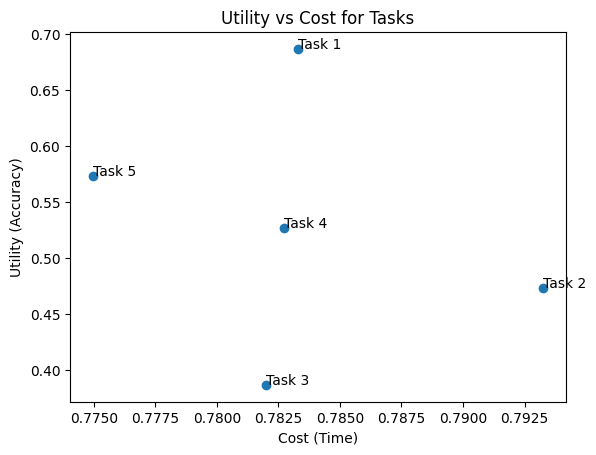

In [ ]:
import time
# Run the pipeline with Chollet's measure
score, metrics = run_knn_pipeline_with_chollet(
    dataset=vgg_dataset,
    num_classes=5,
    num_train_samples=10,
    num_test_samples=30,
    k=3,
    lambda_factor=0.1  # Cost penalty
)

# Visualize metrics
def plot_metrics(task_metrics):
    utilities = [metric["utility"] for metric in task_metrics]
    costs = [metric["cost"] for metric in task_metrics]
    tasks = [f"Task {i+1}" for i in range(len(task_metrics))]

    plt.scatter(costs, utilities)
    for i, task in enumerate(tasks):
        plt.annotate(task, (costs[i], utilities[i]))
    plt.xlabel("Cost (Time)")
    plt.ylabel("Utility (Accuracy)")
    plt.title("Utility vs Cost for Tasks")
    plt.show()

plot_metrics(metrics)


## Flower 2 RNN

In [ ]:
import os
import subprocess
import json
import numpy as np
import tensorflow as tf
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split

# -----------------------------
# Step 1: Extract and Convert Dataset
# -----------------------------

# Step 1.1: Extract the VGG Flower dataset
file_path = "/content/drive/MyDrive/datasets/vgg_flower/102flowers.tgz"
!tar -xzf "{file_path}" -C /content/drive/MyDrive/datasets/vgg_flower/
print("Extraction complete. The jpg/ directory has been created in /content/")

# Step 1.2: Convert the dataset to TFRecords
command = [
    "python", "-m", "meta_dataset.dataset_conversion.convert_datasets_to_records",
    "--dataset=vgg_flower",
    "--vgg_flower_data_root=/content/drive/MyDrive/datasets/vgg_flower",
    "--records_root=/content/drive/MyDrive/datasets/records"
]
result = subprocess.run(command, capture_output=True, text=True)
print(result.stdout)
print(result.stderr)

# Step 1.3: Load dataset specification
spec_path = "/content/drive/MyDrive/datasets/records/vgg_flower/dataset_spec.json"
with open(spec_path, "r") as f:
    dataset_spec = json.load(f)

print("Loaded dataset specification:", dataset_spec)

# -----------------------------
# Step 2: Load Sharded TFRecords
# -----------------------------

# Directory containing the TFRecord files
tfrecord_dir = "/content/drive/MyDrive/datasets/records/vgg_flower/"
tfrecord_files = [os.path.join(tfrecord_dir, f"{i}.tfrecords") for i in range(102)]

# Combine all shards into a single dataset
raw_dataset = tf.data.TFRecordDataset(tfrecord_files)

# -----------------------------
# Step 3: Parse and Preprocess TFRecords
# -----------------------------

def parse_tfrecord(example_proto):
    """
    Parse a single TFRecord example.
    """
    feature_description = {
        "image": tf.io.FixedLenFeature([], tf.string),  # Encoded image
        "label": tf.io.FixedLenFeature([], tf.int64),  # Label
    }
    parsed_features = tf.io.parse_single_example(example_proto, feature_description)

    # Decode and preprocess the image
    image = tf.io.decode_jpeg(parsed_features["image"])
    image = tf.image.resize(image, [224, 224])  # Resize for ResNet
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]

    label = parsed_features["label"]
    return image, label

parsed_dataset = raw_dataset.map(parse_tfrecord).batch(32).prefetch(tf.data.AUTOTUNE)

Extraction complete. The jpg/ directory has been created in /content/

/usr/bin/python3: Error while finding module specification for 'meta_dataset.dataset_conversion.convert_datasets_to_records' (ModuleNotFoundError: No module named 'meta_dataset')

Loaded dataset specification: {'name': 'vgg_flower', 'classes_per_split': {'TRAIN': 71, 'VALID': 15, 'TEST': 16}, 'images_per_class': {'0': 82, '1': 56, '2': 105, '3': 85, '4': 78, '5': 87, '6': 130, '7': 40, '8': 56, '9': 52, '10': 52, '11': 63, '12': 85, '13': 42, '14': 128, '15': 251, '16': 137, '17': 50, '18': 154, '19': 171, '20': 71, '21': 45, '22': 40, '23': 49, '24': 41, '25': 62, '26': 258, '27': 54, '28': 48, '29': 109, '30': 87, '31': 41, '32': 54, '33': 108, '34': 75, '35': 66, '36': 71, '37': 40, '38': 46, '39': 60, '40': 82, '41': 42, '42': 45, '43': 40, '44': 93, '45': 107, '46': 120, '47': 96, '48': 85, '49': 86, '50': 194, '51': 40, '52': 61, '53': 61, '54': 67, '55': 92, '56': 76, '57': 54, '58': 49, '59': 78, '60': 166, 

In [ ]:
import os

# Path to the TFRecord directory
tfrecord_dir = "/content/drive/MyDrive/datasets/records/vgg_flower/"

# List files in the directory
print("Files in TFRecord directory:", os.listdir(tfrecord_dir))


Files in TFRecord directory: ['1.tfrecords', '0.tfrecords', '2.tfrecords', '3.tfrecords', '5.tfrecords', '4.tfrecords', '6.tfrecords', '8.tfrecords', '7.tfrecords', '9.tfrecords', '10.tfrecords', '11.tfrecords', '12.tfrecords', '13.tfrecords', '14.tfrecords', '17.tfrecords', '15.tfrecords', '16.tfrecords', '18.tfrecords', '19.tfrecords', '20.tfrecords', '22.tfrecords', '21.tfrecords', '23.tfrecords', '24.tfrecords', '27.tfrecords', '25.tfrecords', '26.tfrecords', '29.tfrecords', '28.tfrecords', '30.tfrecords', '31.tfrecords', '32.tfrecords', '33.tfrecords', '35.tfrecords', '34.tfrecords', '36.tfrecords', '39.tfrecords', '38.tfrecords', '37.tfrecords', '41.tfrecords', '42.tfrecords', '40.tfrecords', '44.tfrecords', '43.tfrecords', '46.tfrecords', '47.tfrecords', '45.tfrecords', '48.tfrecords', '51.tfrecords', '49.tfrecords', '50.tfrecords', '52.tfrecords', '53.tfrecords', '54.tfrecords', '56.tfrecords', '55.tfrecords', '57.tfrecords', '58.tfrecords', '59.tfrecords', '60.tfrecords', '62.

In [ ]:
import os

# Path to the TFRecord directory
tfrecord_dir = "/content/drive/MyDrive/datasets/records/vgg_flower/"

if os.path.exists(tfrecord_dir):
    print("Directory exists. Files in directory:")
    print(os.listdir(tfrecord_dir))
else:
    print("Directory does not exist.")


Directory exists. Files in directory:
['1.tfrecords', '0.tfrecords', '2.tfrecords', '3.tfrecords', '5.tfrecords', '4.tfrecords', '6.tfrecords', '8.tfrecords', '7.tfrecords', '9.tfrecords', '10.tfrecords', '11.tfrecords', '12.tfrecords', '13.tfrecords', '14.tfrecords', '17.tfrecords', '15.tfrecords', '16.tfrecords', '18.tfrecords', '19.tfrecords', '20.tfrecords', '22.tfrecords', '21.tfrecords', '23.tfrecords', '24.tfrecords', '27.tfrecords', '25.tfrecords', '26.tfrecords', '29.tfrecords', '28.tfrecords', '30.tfrecords', '31.tfrecords', '32.tfrecords', '33.tfrecords', '35.tfrecords', '34.tfrecords', '36.tfrecords', '39.tfrecords', '38.tfrecords', '37.tfrecords', '41.tfrecords', '42.tfrecords', '40.tfrecords', '44.tfrecords', '43.tfrecords', '46.tfrecords', '47.tfrecords', '45.tfrecords', '48.tfrecords', '51.tfrecords', '49.tfrecords', '50.tfrecords', '52.tfrecords', '53.tfrecords', '54.tfrecords', '56.tfrecords', '55.tfrecords', '57.tfrecords', '58.tfrecords', '59.tfrecords', '60.tfrecor

In [ ]:
import tensorflow as tf

# Adjust file pattern based on actual filenames
tfrecord_files = tf.io.gfile.glob("/content/drive/MyDrive/datasets/records/vgg_flower/*.tfrecords")

if not tfrecord_files:
    print("No TFRecord files found.")
else:
    print(f"Found {len(tfrecord_files)} TFRecord files.")
    print(tfrecord_files)


Found 102 TFRecord files.
['/content/drive/MyDrive/datasets/records/vgg_flower/1.tfrecords', '/content/drive/MyDrive/datasets/records/vgg_flower/0.tfrecords', '/content/drive/MyDrive/datasets/records/vgg_flower/2.tfrecords', '/content/drive/MyDrive/datasets/records/vgg_flower/3.tfrecords', '/content/drive/MyDrive/datasets/records/vgg_flower/5.tfrecords', '/content/drive/MyDrive/datasets/records/vgg_flower/4.tfrecords', '/content/drive/MyDrive/datasets/records/vgg_flower/6.tfrecords', '/content/drive/MyDrive/datasets/records/vgg_flower/8.tfrecords', '/content/drive/MyDrive/datasets/records/vgg_flower/7.tfrecords', '/content/drive/MyDrive/datasets/records/vgg_flower/9.tfrecords', '/content/drive/MyDrive/datasets/records/vgg_flower/10.tfrecords', '/content/drive/MyDrive/datasets/records/vgg_flower/11.tfrecords', '/content/drive/MyDrive/datasets/records/vgg_flower/12.tfrecords', '/content/drive/MyDrive/datasets/records/vgg_flower/13.tfrecords', '/content/drive/MyDrive/datasets/records/vgg_

In [ ]:
# -----------------------------
# Step 4: Feature Extraction Using ResNet50
# -----------------------------

from tensorflow.keras.applications import ResNet50

# Load pretrained ResNet50 model
resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg')

def extract_features_from_parsed_dataset(parsed_dataset):
    """
    Extract features from the parsed dataset using ResNet50.
    """
    features = []
    labels = []
    for batch_images, batch_labels in parsed_dataset:
        batch_features = resnet.predict(batch_images)  # Extract features
        features.append(batch_features)
        labels.append(batch_labels.numpy())
    return np.vstack(features), np.hstack(labels)

# Extract features and labels
data, labels = extract_features_from_parsed_dataset(parsed_dataset)

# Prepare the dataset
vgg_dataset = {
    "classes": np.unique(labels),  # Unique class IDs
    "data": data,  # Extracted feature vectors
    "labels": labels  # Class labels
}

print(f"Prepared VGG Dataset: {len(vgg_dataset['data'])} samples, {len(vgg_dataset['classes'])} classes")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1

In [ ]:
import os
import subprocess
import json
import numpy as np
import tensorflow as tf
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
import time





# -----------------------------
# Step 5: Define the RNN Model
# -----------------------------

class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Use the last time step
        return out

# -----------------------------
# Step 6: Implement Chollet's Measure
# -----------------------------

def evaluate_task(rnn_model, task, criterion, optimizer, num_epochs=10):
    """
    Train and evaluate the RNN model on a specific task, returning utility and cost.
    """
    print("X_train shape before reshaping:", task["X_train"].shape)
    print("Y_train shape:", task["Y_train"].shape)

    def reshape_data(X, Y):
        """
        Reshape data for RNN input by adding a sequence dimension.
        Args:
            X: Feature vectors of shape (num_samples, input_size)
            Y: Labels
        Returns:
            X_reshaped: Tensor of shape (num_samples, 1, input_size)
            Y: Tensor of labels
        """
        X_reshaped = np.expand_dims(X, axis=1)  # Add sequence length dimension
        return torch.tensor(X_reshaped, dtype=torch.float32), torch.tensor(Y, dtype=torch.long)

    # Reshape the task data
    X_train, Y_train = reshape_data(task["X_train"], task["Y_train"])
    X_test, Y_test = reshape_data(task["X_test"], task["Y_test"])

    # Confirm shapes
    print("X_train shape after reshaping:", X_train.shape)  # Should be (num_samples, 1, input_size)
    print("Y_train shape:", Y_train.shape)  # Should be (num_samples,)

    # Prepare data loaders using reshaped data
    train_loader = torch.utils.data.DataLoader(list(zip(X_train, Y_train)), batch_size=32, shuffle=True)
    test_loader = torch.utils.data.DataLoader(list(zip(X_test, Y_test)), batch_size=32, shuffle=False)

    # Train the RNN
    rnn_model.train()
    start_time = time.time()
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            # Debugging: Print shape of inputs before passing to the model
            print("Input to RNN shape:", inputs.shape)  # Should be (batch_size, 1, input_size)

            # Move inputs and labels to device
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            # Pass inputs to the RNN
            outputs = rnn_model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    training_time = time.time() - start_time

    # Evaluate the RNN
    rnn_model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = rnn_model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total

    return accuracy, training_time


def chollet_score(task_metrics, lambda_factor=0.1):
    """
    Compute Chollet's intelligence score from task metrics.
    """
    total_score = 0
    for metric in task_metrics:
        utility, cost = metric["utility"], metric["cost"]
        total_score += utility - lambda_factor * cost
    return total_score / len(task_metrics)

def create_task(dataset, num_classes, num_train_samples, num_test_samples):
    """
    Create a task by sampling `num_classes` and splitting into train/test sets.

    Args:
        dataset: Dictionary with keys 'classes', 'data', 'labels'.
        num_classes: Number of classes for the task.
        num_train_samples: Number of training samples per class.
        num_test_samples: Number of testing samples per class.

    Returns:
        Dictionary with 'X_train', 'Y_train', 'X_test', 'Y_test'.
    """
    # Randomly select `num_classes` from the dataset
    selected_classes = np.random.choice(dataset["classes"], size=num_classes, replace=False)
    X_train, Y_train, X_test, Y_test = [], [], [], []

    for cls in selected_classes:
        # Filter data and labels for the current class
        class_data = dataset["data"][dataset["labels"] == cls]
        class_labels = dataset["labels"][dataset["labels"] == cls]

        # Ensure there are enough samples for the task
        if len(class_data) < num_train_samples + num_test_samples:
            continue

        # Split the class data into train and test sets
        indices = np.random.permutation(len(class_data))
        train_indices = indices[:num_train_samples]
        test_indices = indices[num_train_samples:num_train_samples + num_test_samples]

        X_train.extend(class_data[train_indices])
        Y_train.extend(class_labels[train_indices])
        X_test.extend(class_data[test_indices])
        Y_test.extend(class_labels[test_indices])

    return {
        "X_train": np.array(X_train),
        "Y_train": np.array(Y_train),
        "X_test": np.array(X_test),
        "Y_test": np.array(Y_test),
        "task_name": f"{num_classes}-way Classification Task"
    }


# -----------------------------
# Step 7: Run the Pipeline
# -----------------------------

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_size = data.shape[1]
hidden_size = 64
output_size = len(vgg_dataset["classes"])

rnn_model = RNNModel(input_size, hidden_size, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=0.001)

# Evaluate multiple tasks and compute Chollet's measure
task_metrics = []
for _ in range(5):  # Evaluate on 5 tasks
    # Create a new task
    task = create_task(vgg_dataset, num_classes=5, num_train_samples=10, num_test_samples=30)
    utility, cost = evaluate_task(rnn_model, task, criterion, optimizer, num_epochs=10)
    task_metrics.append({"utility": utility, "cost": cost})
    print(f"Task Utility: {utility:.2f}, Task Cost: {cost:.2f} seconds")

# Compute Chollet's intelligence score
score = chollet_score(task_metrics, lambda_factor=0.1)
print(f"Chollet's Intelligence Score: {score:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import time

# -----------------------------
# Step 1: Linear Regression Task Evaluation
# -----------------------------

def evaluate_linear_regression_task(model, task):
    """
    Train and evaluate a linear regression model on a specific task.
    Returns utility (negative MSE) and cost (training time).
    """
    # Extract training and testing data
    X_train, Y_train = task["X_train"], task["Y_train"]
    X_test, Y_test = task["X_test"], task["Y_test"]

    # Train the linear regression model
    start_time = time.time()
    model.fit(X_train, Y_train)
    training_time = time.time() - start_time

    # Predict on the test set
    Y_pred = model.predict(X_test)

    # Calculate utility as negative MSE (higher is better)
    mse = mean_squared_error(Y_test, Y_pred)
    utility = -mse

    return utility, training_time

# -----------------------------
# Step 2: Chollet's Measure
# -----------------------------

def chollet_score(task_metrics, lambda_factor=0.1):
    """
    Compute Chollet's intelligence score from task metrics.
    """
    total_score = 0
    for metric in task_metrics:
        utility, cost = metric["utility"], metric["cost"]
        total_score += utility - lambda_factor * cost
    return total_score / len(task_metrics)

# -----------------------------
# Step 3: Task Creation
# -----------------------------

def create_task(dataset, num_features, num_train_samples, num_test_samples):
    """
    Create a task by sampling features and splitting into train/test sets.

    Args:
        dataset: Dictionary with keys 'data', 'labels'.
        num_features: Number of features to use for the task.
        num_train_samples: Number of training samples.
        num_test_samples: Number of testing samples.

    Returns:
        Dictionary with 'X_train', 'Y_train', 'X_test', 'Y_test'.
    """
    # Randomly sample `num_features` from the feature set
    feature_indices = np.random.choice(dataset["data"].shape[1], size=num_features, replace=False)
    selected_data = dataset["data"][:, feature_indices]

    # Randomly split into train and test sets
    indices = np.random.permutation(len(selected_data))
    train_indices = indices[:num_train_samples]
    test_indices = indices[num_train_samples:num_train_samples + num_test_samples]

    X_train = selected_data[train_indices]
    Y_train = dataset["labels"][train_indices]
    X_test = selected_data[test_indices]
    Y_test = dataset["labels"][test_indices]

    return {
        "X_train": X_train,
        "Y_train": Y_train,
        "X_test": X_test,
        "Y_test": Y_test,
        "task_name": f"{num_features}-feature Regression Task"
    }

# -----------------------------
# Step 4: Run the Pipeline
# -----------------------------

# Prepare the dataset
vgg_dataset = {
    "data": data,  # Extracted feature vectors from ResNet50
    "labels": labels  # Continuous labels (ensure they're numerical for regression)
}

# Create and evaluate tasks
linear_model = LinearRegression()
task_metrics = []

for _ in range(5):  # Evaluate on 5 tasks
    # Create a new task
    task = create_task(vgg_dataset, num_features=10, num_train_samples=50, num_test_samples=30)

    # Train and evaluate on the task
    utility, cost = evaluate_linear_regression_task(linear_model, task)
    task_metrics.append({"utility": utility, "cost": cost})
    print(f"Task Utility (negative MSE): {utility:.4f}, Task Cost: {cost:.4f} seconds")

# Compute Chollet's intelligence score
score = chollet_score(task_metrics, lambda_factor=0.1)
print(f"Chollet's Intelligence Score: {score:.4f}")


Task Utility (negative MSE): -1530.2873, Task Cost: 0.0290 seconds
Task Utility (negative MSE): -907.2628, Task Cost: 0.0009 seconds
Task Utility (negative MSE): -1351.1139, Task Cost: 0.0008 seconds
Task Utility (negative MSE): -770.5872, Task Cost: 0.0008 seconds
Task Utility (negative MSE): -1149.3997, Task Cost: 0.0007 seconds
Chollet's Intelligence Score: -1141.7308
